In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'time'
experiments = {k:{} for k in paths}

In [3]:
def process_time(file):
    with open(file) as time_file:
        lines = time_file.readlines()
        """        lines = [line.strip() for line in lines if len(line) > 2]
        times = {
            'sys':[line for line in lines if 'sys' in line],
            'user' : [line for line in lines if 'user' in line],
            'real': [line for line in lines if 'real' in line]
        }
        
        for key in times:
            values = times[key]
            values = [v.split('\t')[1] for v in values]
            values = [float(v.split('m')[0])*60 + float(v.split('m')[1][:-1].replace(',', '.')) for v in values]
            times[key] = values"""
    return [int(time) for time in lines]
process_time("/home/dcandrade/Documents/Subjects/Computação de Alto Desempenho/hpc-facial-expression-recognition/results/size-scalability/500/time.txt")

[4946, 4951, 4950, 4950, 4952]

In [4]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                #subtype_files.append(pd.read_csv(experiment_file, header=0))
                experiments[experiment_type][subtype] = process_time(experiment_file)

In [5]:
size_df = pd.DataFrame(experiments['size-scalability']).transpose().rename(index={"500":592, "2k":2092, "4k":4092, "8k":8092, "1k":1092}).sort_index()
epochs_df = pd.DataFrame(experiments['epoch-scalability']).transpose().rename(index=int)

In [6]:
size_df = pd.DataFrame(size_df.apply(sorted, axis=1))
size_df = size_df.applymap(lambda x: x[1:-1]).rename(columns={0:'Tempo (s)'})
size_df

,Tempo (s)
592,"[4950, 4950, 4951]"
1092,"[6393, 6427, 6460]"
2092,"[8810, 8838, 8855]"
4092,"[14797, 14803, 14833]"
8092,"[26173, 26184, 26210]"


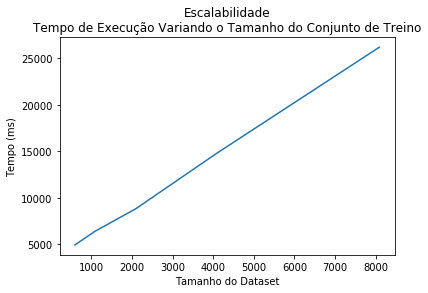

In [7]:
plot = size_df.applymap(pd.np.average).plot(legend=False)
plot.set_title("Escalabilidade\nTempo de Execução Variando o Tamanho do Conjunto de Treino")
plot.set_xlabel("Tamanho do Dataset")
plot.set_ylabel("Tempo (ms)")
plt.savefig(paths['size-scalability']+"/size-scalability.eps", format='eps')

In [8]:
epochs_df = pd.DataFrame(epochs_df.apply(sorted, axis=1))
epochs_df = epochs_df.applymap(lambda x: x[1:-1]).rename(columns={0:'Tempo (s)'})
epochs_df

,Tempo (s)
50,"[14323, 15178, 15899]"
100,"[26184, 26204, 26226]"
25,"[9625, 9625, 9627]"
200,"[48262, 48288, 48334]"
400,"[92487, 92561, 92628]"


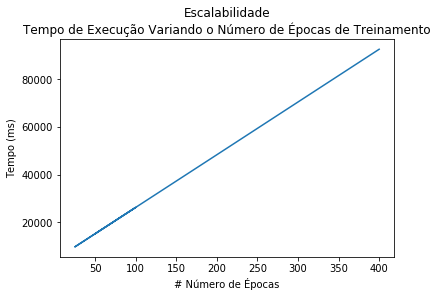

In [9]:
plot = epochs_df.applymap(pd.np.average).plot(legend=False)
plot.set_title("Escalabilidade\nTempo de Execução Variando o Número de Épocas de Treinamento")
plot.set_xlabel("# Número de Épocas")
plot.set_ylabel("Tempo (ms)")
plt.savefig(paths['epoch-scalability']+"/epoch-scalability.eps", format='eps')